<a href="https://colab.research.google.com/github/cuimingyang1996/Azog/blob/master/Lung_Cancer_Date_Challenge_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Lung Cancer Dataset/cancer patient data sets.csv')

In [ ]:
## dimensions of data
df.shape

(1000, 26)

In [ ]:
df.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


##2. Do data cleaning/Data preparation !

In [ ]:
df.drop("Patient Id", axis=1, inplace=True)

In [ ]:
## returns total missing values in every column
df.isnull().sum()

,0
index,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0
Balanced Diet,0


In [ ]:
df.dtypes ## tells data-types ofb every feature !

,0
index,int64
Age,int64
Gender,int64
Air Pollution,int64
Alcohol use,int64
Dust Allergy,int64
OccuPational Hazards,int64
Genetic Risk,int64
chronic Lung Disease,int64
Balanced Diet,int64


In [ ]:
df = df.drop("index", axis =1)

In [ ]:
round(df.describe().iloc[2:, ].T, 3).style.format(precision=3).background_gradient(axis=1)

,std,min,25%,50%,75%,max
Age,12.005,14.000,27.750,36.000,45.000,73.000
Gender,0.491,1.000,1.000,1.000,2.000,2.000
Air Pollution,2.030,1.000,2.000,3.000,6.000,8.000
Alcohol use,2.620,1.000,2.000,5.000,7.000,8.000
Dust Allergy,1.981,1.000,4.000,6.000,7.000,8.000
OccuPational Hazards,2.108,1.000,3.000,5.000,7.000,8.000
Genetic Risk,2.127,1.000,2.000,5.000,7.000,7.000
chronic Lung Disease,1.849,1.000,3.000,4.000,6.000,7.000
Balanced Diet,2.136,1.000,2.000,4.000,7.000,7.000
Obesity,2.125,1.000,3.000,4.000,7.000,7.000


In [ ]:
# List of columns for which to print frequency tables
columns = ['Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet','Obesity','Smoking','Passive Smoker','Chest Pain','Coughing of Blood','Fatigue','Weight Loss','Shortness of Breath','Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring']

# Loop through each column and print the frequency table
for column in columns:
    print(f"Frequency table for {column}:")
    print(df[column].value_counts())
    print("\n")

Frequency table for Gender:
Gender
1    598
2    402
Name: count, dtype: int64


Frequency table for Air Pollution:
Air Pollution
6    326
2    201
3    173
1    141
4     90
7     30
5     20
8     19
Name: count, dtype: int64


Frequency table for Alcohol use:
Alcohol use
2    202
8    188
7    167
1    152
5     90
3     80
6     80
4     41
Name: count, dtype: int64


Frequency table for Dust Allergy:
Dust Allergy
7    405
4    133
5    111
6    110
3    101
2     70
1     60
8     10
Name: count, dtype: int64


Frequency table for OccuPational Hazards:
OccuPational Hazards
7    365
3    151
2    132
5    130
4    112
1     50
6     30
8     30
Name: count, dtype: int64


Frequency table for Genetic Risk:
Genetic Risk
7    327
2    212
3    173
6    108
5    100
4     40
1     40
Name: count, dtype: int64


Frequency table for chronic Lung Disease:
chronic Lung Disease
6    308
2    173
4    141
3    141
7    107
5     80
1     50
Name: count, dtype: int64


Frequency table for Bal

##2.1 | Splitting Into y and X

In [ ]:
# Showing data
X = df.drop(columns=['Level'])
y = df.Level

display(X.head())
print(y[:5])

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


0       Low
1    Medium
2      High
3      High
4      High
Name: Level, dtype: object


In [ ]:
from scipy import stats
from scipy.stats import norm, skew

from sklearn.model_selection import train_test_split # 4.1
from sklearn.linear_model import LogisticRegression  # 4.2
from sklearn.ensemble import RandomForestClassifier  # 4.3
from sklearn.naive_bayes import GaussianNB           # 4.4
from sklearn.neighbors import KNeighborsClassifier   # 4.5
from sklearn.svm import SVC                          # 4.6
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


## Training Testing Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f'Shapes - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

print(f'\nTraining output counts\n{y_train.value_counts()}')

Shapes - X Training: (750, 23) and X Testing (250, 23)
Shapes - Y Training: (750,) and Y Testing (250,)

Training output counts
Level
High      261
Medium    252
Low       237
Name: count, dtype: int64


In [ ]:
X_train.shape

(750, 23)

In [ ]:
df.shape

(1000, 25)

## Correlation plot for each variables

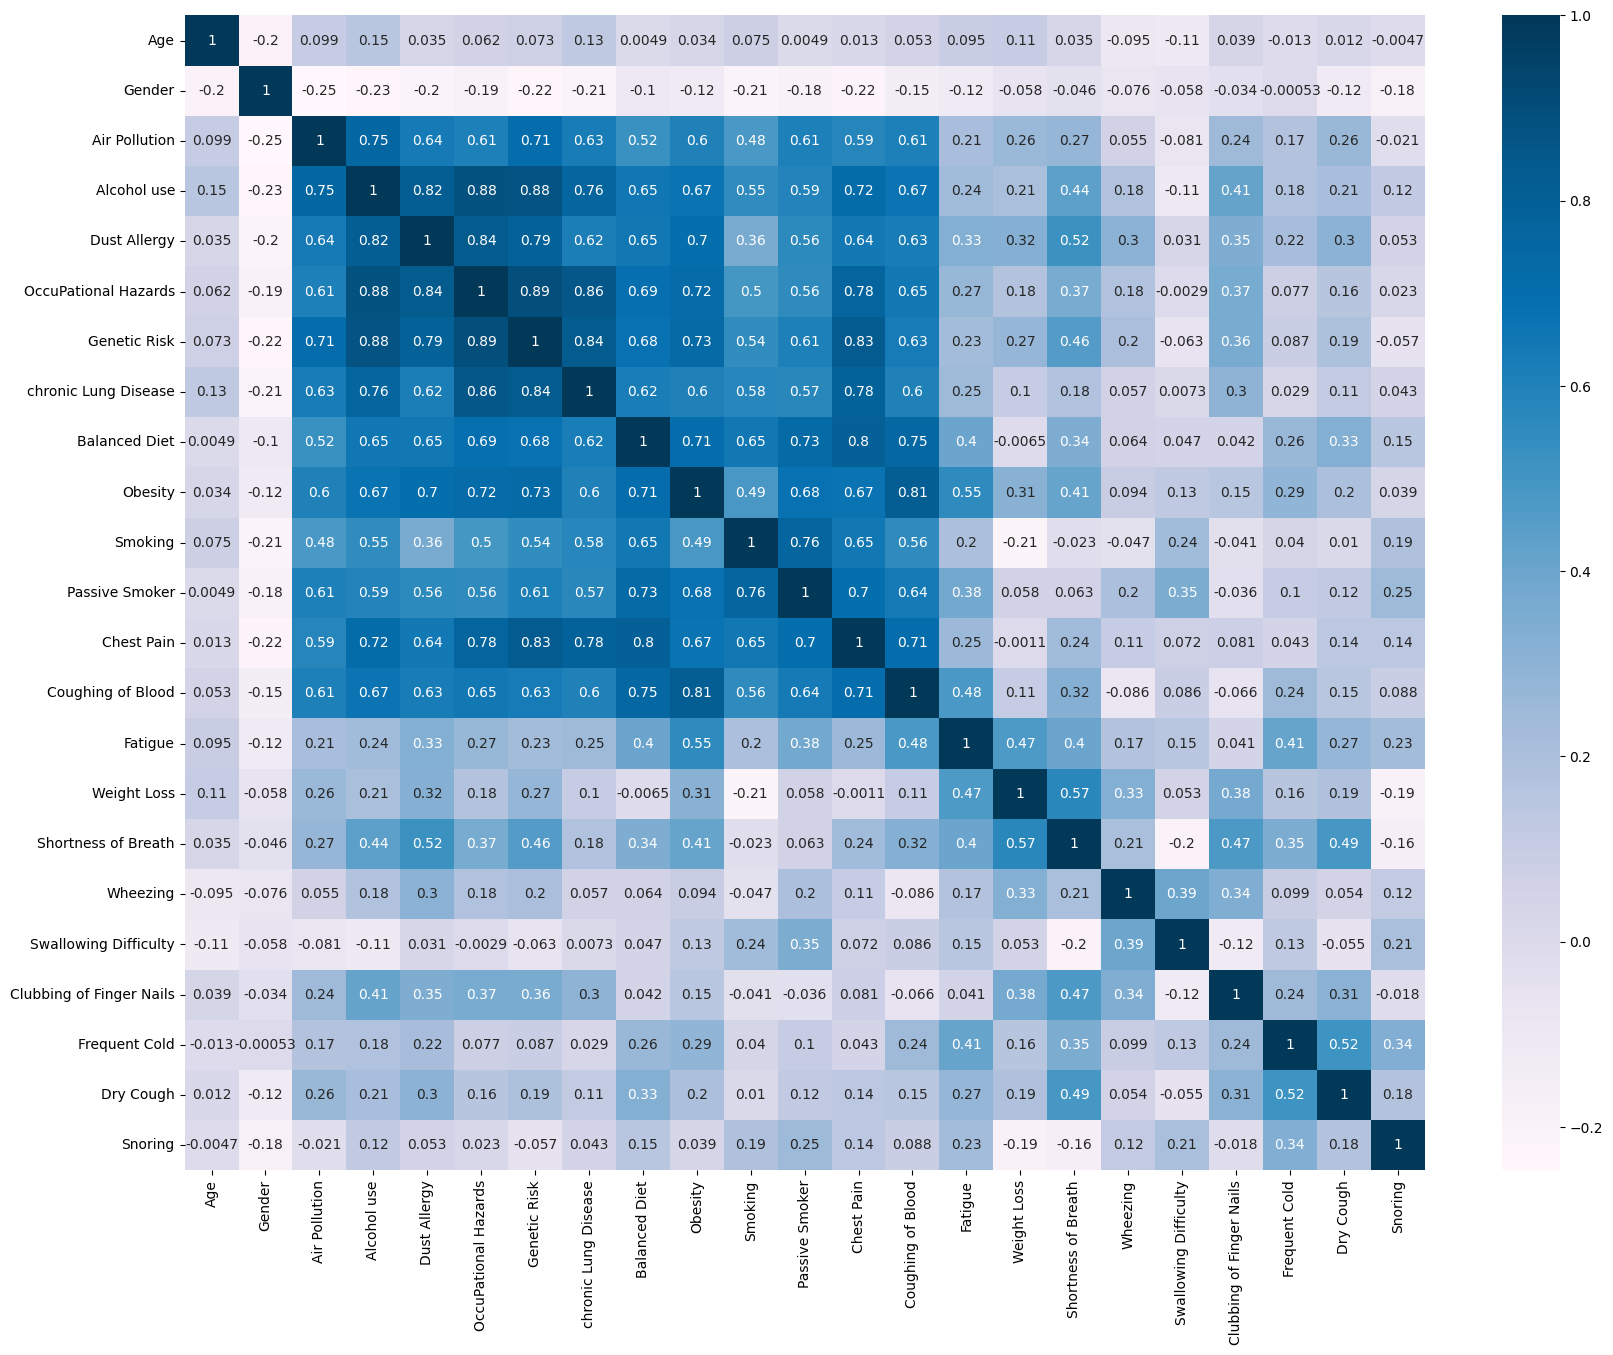

In [ ]:
# Correlation plot
plt.figure(figsize=(20,15))
sns.heatmap(X.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

In [ ]:
# Import the random forest model.
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize the model with default value of parameters..
rf_model = RandomForestClassifier()

In [ ]:
# Fit the model to the data...
rf_model.fit(X_train , y_train)

RandomForestClassifier()

In [ ]:
# Make predictions..

predictions = rf_model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       104
         Low       1.00      1.00      1.00        66
      Medium       1.00      1.00      1.00        80

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [ ]:
accuracy_score(predictions , y_test)

1.0

In [ ]:
# Compute the error.. \

confusion_matrix(predictions , y_test)

array([[104,   0,   0],
       [  0,  66,   0],
       [  0,   0,  80]])

## Multinomial Logistic Regression

In [ ]:
MR = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=40)

# fitting model
MR.fit(X_train, y_train)

# predicting with model
MR_pred = MR.predict(X_test)

# Printing model coefficents
print('Intercept: \n', MR.intercept_)
print('Coefficients: \n', MR.coef_)

Intercept: 
 [-36.45706016  37.39666457  -0.93960441]
Coefficients: 
 [[-0.00711224  0.0396087   0.48636962  0.62011021 -0.13639334  0.00394386
   0.22878882  0.36487141  0.33740968  0.48878279  0.0957953   0.83592354
   0.0697913   0.84553348  0.83865659  0.37923404  0.50452536  0.16638425
   0.87391511  0.43716125  0.41531101  0.37733951  0.29553436]
 [-0.04208394  0.10340001 -0.17478275 -0.41472132 -0.28453732  0.04750754
  -0.48574018 -0.23606515 -0.04185628 -0.99470935 -0.02037932 -0.95406033
   0.27793461 -0.83122612 -0.73276334  0.04772256 -0.26655389 -0.93876692
  -0.83397752 -0.77913698 -0.63917831 -0.50199551 -0.72129002]
 [ 0.04919618 -0.14300871 -0.31158686 -0.20538888  0.42093066 -0.0514514
   0.25695136 -0.12880626 -0.2955534   0.50592656 -0.07541598  0.11813679
  -0.34772591 -0.01430736 -0.10589325 -0.4269566  -0.23797147  0.77238266
  -0.03993759  0.34197573  0.2238673   0.124656    0.42575566]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
